<h2 style='text-align:center;font-family:Calibri, sans-serif;font-size:40px;background-color:maroon;border:20px;color:white'>Credit Card Users Churn Prediction<h2>

# Exploratory Data Analysis and Insights

**Problem definition, questions to be answered**
- Data background and contents
- Univariate analysis
- Bivariate analysis
- Key meaningful observations on individual variables and the relationship between variables

## Introduction

### Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards You need to identify the best possible model that will give the required performance

### Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

#### Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown,
* Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Overview and Descriptive Statistics

### **Importing of Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

from datetime import datetime

# To impute missing values
from sklearn.impute import KNNImputer, SimpleImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune model, get different metric scores and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.plots import plot_objective, plot_histogram
from skopt.utils import use_named_args
from skopt.plots import plot_evaluations
from skopt import gp_minimize
from skopt.plots import plot_convergence

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Coerce printing of floats in 2 d.p
pd.options.display.float_format = '{:,.3f}'.format

<IPython.core.display.Javascript object>

### **Loading of the Dataset**

In [2]:
#Loading dataset
data_init = pd.read_csv('BankChurners.csv')

# Create copy
data = data_init.copy()

<IPython.core.display.Javascript object>

**View the first 5 rows of the dataset.**

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3    12,691.000                  777       11,914.000   
1                      2     8,256.000                  864        7,392.000   
2                      0     3,418.000                    0        3,418.000   
3                      1     3,313.000                 2517          796.000   
4                      0     4,716.000                    0        4,716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

**Check data types and number of non-null values for each column.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

- We can see that there are total of 21 columns and 10,127 rows in the dataset.
- All columns data type is either integer, Float or the object type.
- There are missing values in the dataset

In [5]:
data.isna().sum().sort_values(ascending = False)

Education_Level             1519
Marital_Status               749
CLIENTNUM                      0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Attrition_Flag                 0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- Education_Level and Marital_Status have the most missing records

**Check duplicates Count**

In [6]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* Dataset contains no duplicates

### Fixing the data types

In [7]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
for i in cols.columns:
    data[i] = data[i].astype('category')

<IPython.core.display.Javascript object>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<IPython.core.display.Javascript object>

### **Summary of the dataset**

In [10]:
# Summary of continuous columns
data.select_dtypes(['int64', 'float64']).describe().T

count            mean            std  \
CLIENTNUM                10,127.000 739,177,606.334 36,903,783.450   
Customer_Age             10,127.000          46.326          8.017   
Dependent_count          10,127.000           2.346          1.299   
Months_on_book           10,127.000          35.928          7.986   
Total_Relationship_Count 10,127.000           3.813          1.554   
Months_Inactive_12_mon   10,127.000           2.341          1.011   
Contacts_Count_12_mon    10,127.000           2.455          1.106   
Credit_Limit             10,127.000       8,631.954      9,088.777   
Total_Revolving_Bal      10,127.000       1,162.814        814.987   
Avg_Open_To_Buy          10,127.000       7,469.140      9,090.685   
Total_Amt_Chng_Q4_Q1     10,127.000           0.760          0.219   
Total_Trans_Amt          10,127.000       4,404.086      3,397.129   
Total_Trans_Ct           10,127.000          64.859         23.473   
Total_Ct_Chng_Q4_Q1      10,127.000           0.712          0.238   
Avg_Utilization_Ratio    10,127.000           0.275          0.276   

                                     min             25%             50%  \
CLIENTNUM                708,082,083.000 713,036,770.500 717,926,358.000   
Customer_Age                      26.000          41.000          46.000   
Dependent_count                    0.000           1.000           2.000   
Months_on_book                    13.000          31.000          36.000   
Total_Relationship_Count           1.000           3.000           4.000   
Months_Inactive_12_mon             0.000           2.000           2.000   
Contacts_Count_12_mon              0.000           2.000           2.000   
Credit_Limit                   1,438.300       2,555.000       4,549.000   
Total_Revolving_Bal                0.000         359.000       1,276.000   
Avg_Open_To_Buy                    3.000       1,324.500       3,474.000   
Total_Amt_Chng_Q4_Q1               0.000           0.631           0.736   
Total_Trans_Amt                  510.000       2,155.500       3,899.000   
Total_Trans_Ct                    10.000          45.000          67.000   
Total_Ct_Chng_Q4_Q1                0.000           0.582           0.702   
Avg_Utilization_Ratio              0.000           0.023           0.176   

                                     75%             max  
CLIENTNUM                773,143,533.000 828,343,083.000  
Customer_Age                      52.000          73.000  
Dependent_count                    3.000           5.000  
Months_on_book                    40.000          56.000  
Total_Relationship_Count           5.000           6.000  
Months_Inactive_12_mon             3.000           6.000  
Contacts_Count_12_mon              3.000           6.000  
Credit_Limit                  11,067.500      34,516.000  
Total_Revolving_Bal            1,784.000       2,517.000  
Avg_Open_To_Buy                9,859.000      34,516.000  
Total_Amt_Chng_Q4_Q1               0.859           3.397  
Total_Trans_Amt                4,741.000      18,484.000  
Total_Trans_Ct                    81.000         139.000  
Total_Ct_Chng_Q4_Q1                0.818           3.714  
Avg_Utilization_Ratio              0.503           0.999

<IPython.core.display.Javascript object>

- **`Customer_Age`**: The youngest customer is 26 years
- **`Dependent_count`**: The highest number of dependants is 5
- **`Months_on_book`**: The customers have joined the bank between 13 to 56 months
- **`Total_Relationship_Count`**: The maximum products held by the customers is 6
- **`Months_Inactive_12_mon`**: The customers have been inactive for a maximum of 6 months
- **`Contacts_Count_12_mon`**: The customers have made contact with the bank for a maximum of 6 times
- **`Credit_Limit`**: This varied between \\$1,438.30 to \\$34,516.00
- **`Total_Revolving_Bal`**: Customers carrried over between \\$814.66 to \\$2,517.00
- **`Avg_Open_To_Buy`**: Customers had between \\$3.00 to \\$34,516.00 available to spend
- **`Total_Amt_Chng_Q4_Q1`**: This ratio varied between 0 and 3.40
- **`Total_Trans_Amt`**: Transactions ranged between \\$510.00 to \\$18,484.00
- **`Total_Trans_Ct`**: Betwen 10 to 139 transactions were made in the last 12 months
- **`Total_Ct_Chng_Q4_Q1`**: This ratio varied between 0 and 3.71
- **`Avg_Utilization_Ratio`**: This ratio varied between 0 and 1

- All numerical features should undergo standard scaling before Model building

**Number of unique values in each column**

In [11]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

* There are no extreme categorical variables with a high number of categories
* The festures with high number of unique variables are numerical

**Number of observations in each category**

In [12]:
cat_cols = data.select_dtypes(['category']).columns.to_list()

for column in cat_cols:
    if data[column].value_counts().size:
        print(data[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


<IPython.core.display.Javascript object>

- **`Income_Category`** 'abc' does not make sense and should be treated as a missing value. Also, it can be decomposed to lower and upper limits where there is a more accurate sense of order

## Univariate Analysis (Numerical)

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Customer_Age

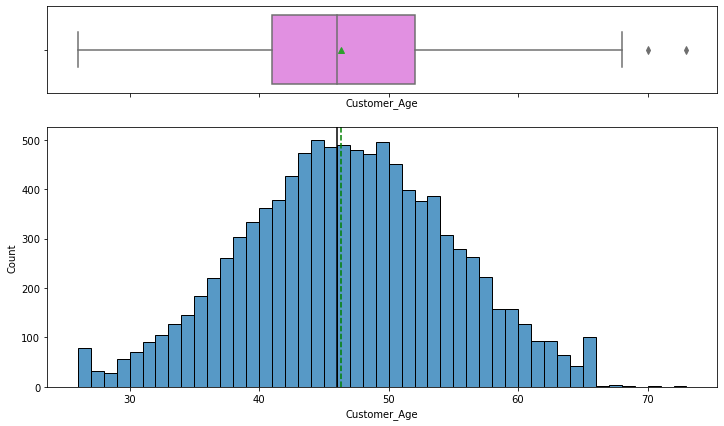

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "Customer_Age")

* The distribution is normal

### Months_on_book

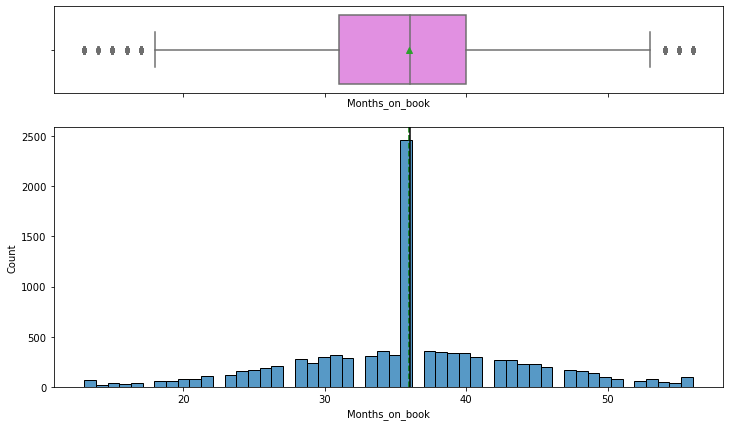

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "Months_on_book")

* The distribution is normal with a very significant peak. The outliers can be adjusted using a Logarithmic Scale

### Credit_Limit

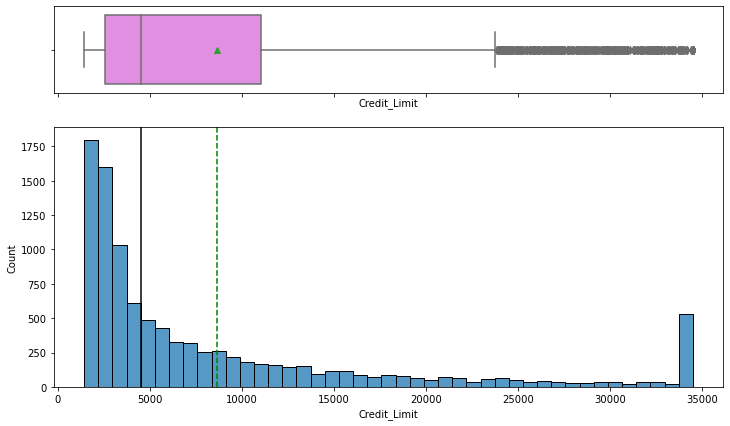

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Credit_Limit")

* The distribution is highly skewed to the right

### Total_Revolving_Bal

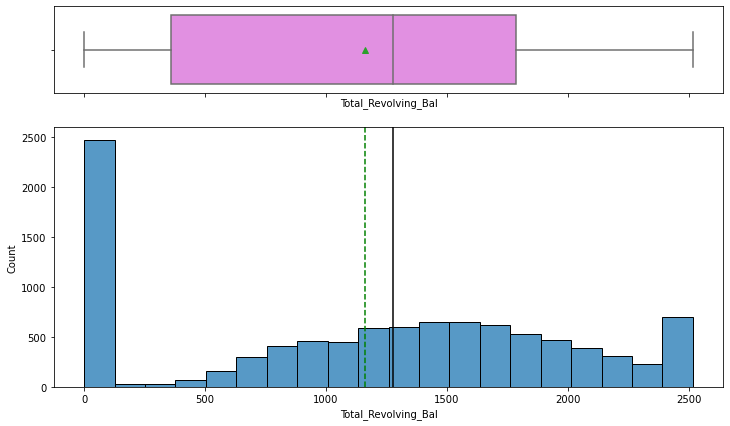

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Total_Revolving_Bal")

* The distribution is normal skewed with a significant number of people with no Total_Revolving_Bal

### Avg_Open_To_Buy

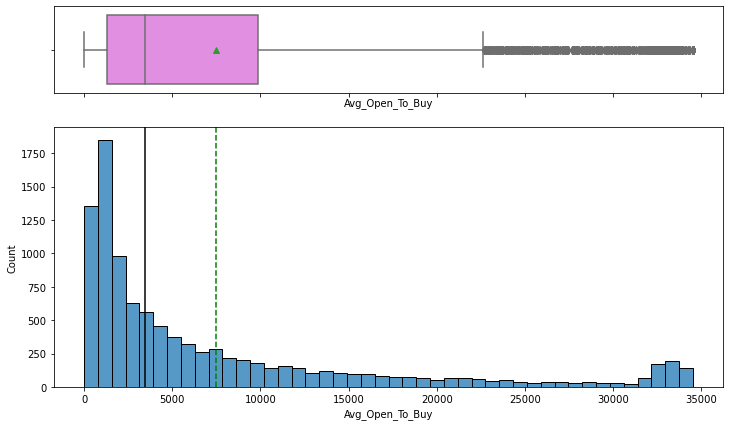

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Avg_Open_To_Buy")

* The distribution is highly skewed to the right

### Total_Amt_Chng_Q4_Q1

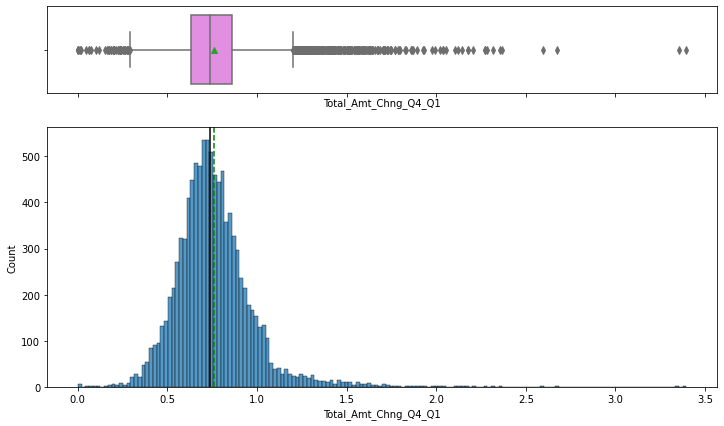

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

* The distribution is almost normal with a large amount of outliers

### Total_Trans_Amt

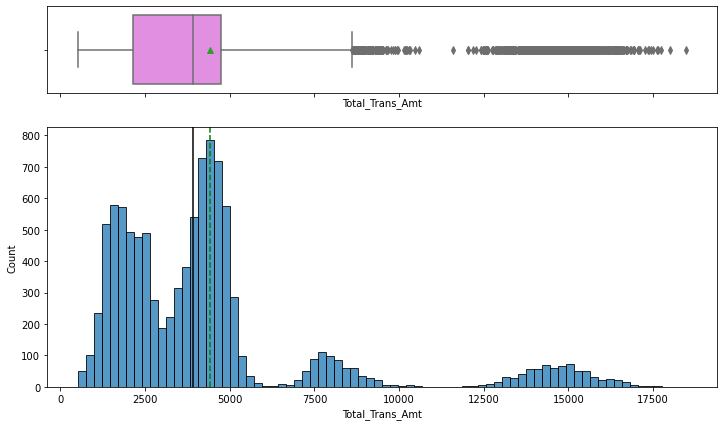

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Total_Trans_Amt")

* The distribution is abnormally skewed with multiple peaks and should be transformed. Also, the distribution has many outliers

### Total_Trans_Ct

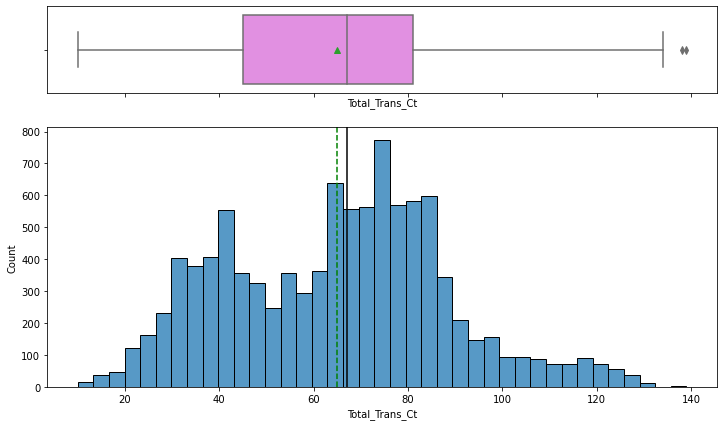

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Total_Trans_Ct")

* The distribution is abnormally skewed but almost normal.

### Total_Ct_Chng_Q4_Q1

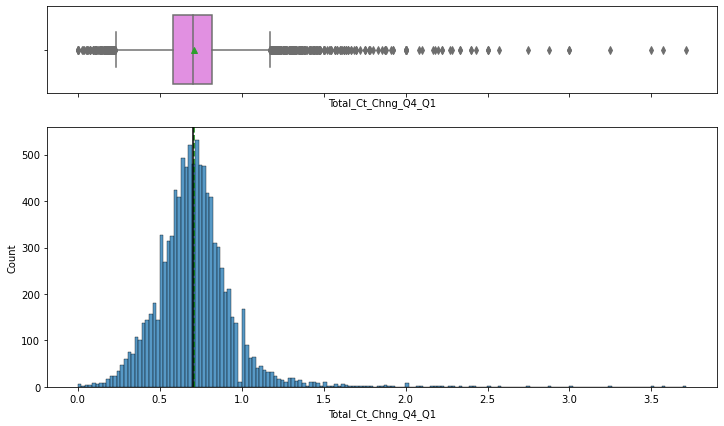

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

* The distribution is almost normal with a large amount of outliers

### Avg_Utilization_Ratio

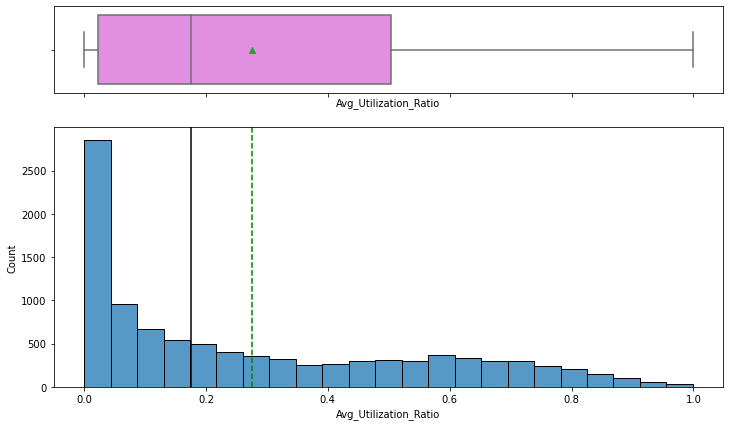

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

* The distribution is highly skewed to the right

## Univariate Analysis (Categorical)

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Dependent_count

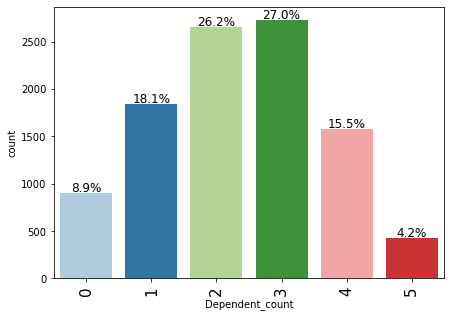

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Dependent_count",perc=True)

- Most of the customers have two or three dependants

### Total_Relationship_Count

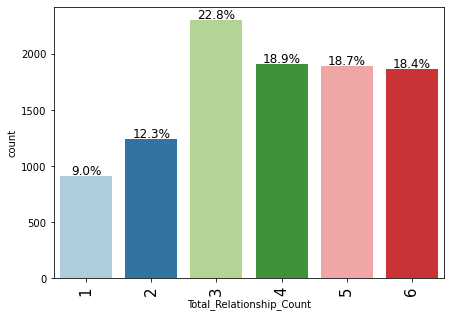

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Total_Relationship_Count",perc=True)

- Most of the customers have three products

### Months_Inactive_12_mon

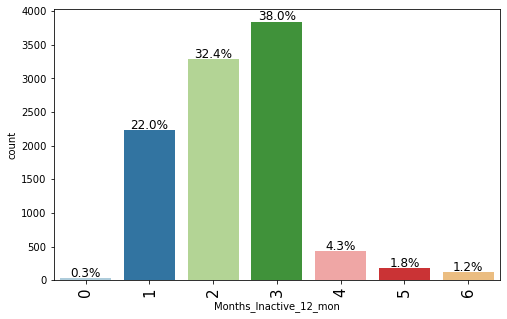

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "Months_Inactive_12_mon",perc=True)

- Most of the customers are inactive between 1 - 3 months

### Contacts_Count_12_mon

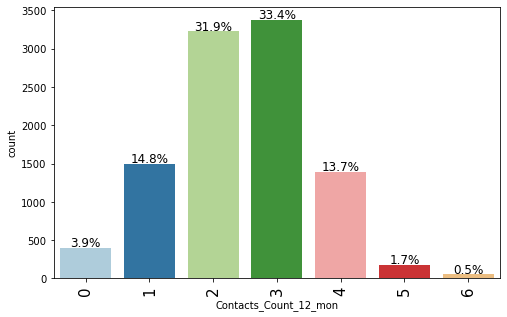

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "Contacts_Count_12_mon",perc=True)

- Most of the customers have contacted the bank two or three times

### Gender

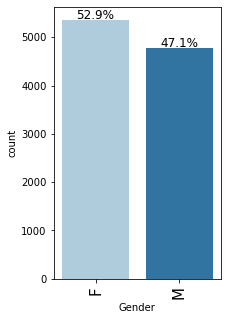

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "Gender",perc=True)

- Most of the customers are females

### Education_Level

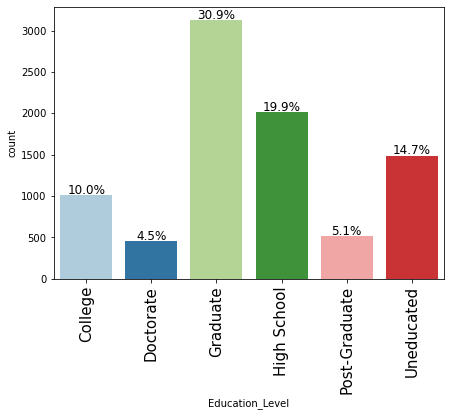

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "Education_Level",perc=True)

- Most of the customers are graduates

### Marital_Status

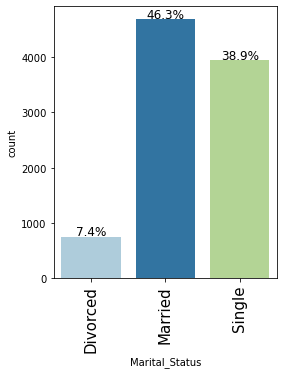

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "Marital_Status",perc=True)

- Most of the customers are Married

### Income_Category

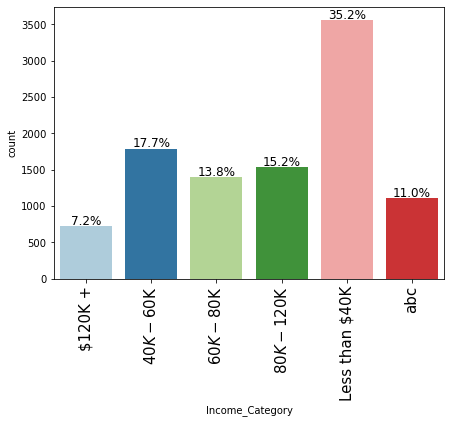

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Income_Category",perc=True)

- Most of the customers earn less than 40k

### Card_Category

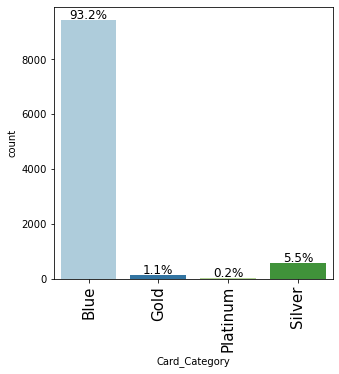

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "Card_Category",perc=True)

- Most of the customers have the blue card

## Bivariate Analysis (Numerical)

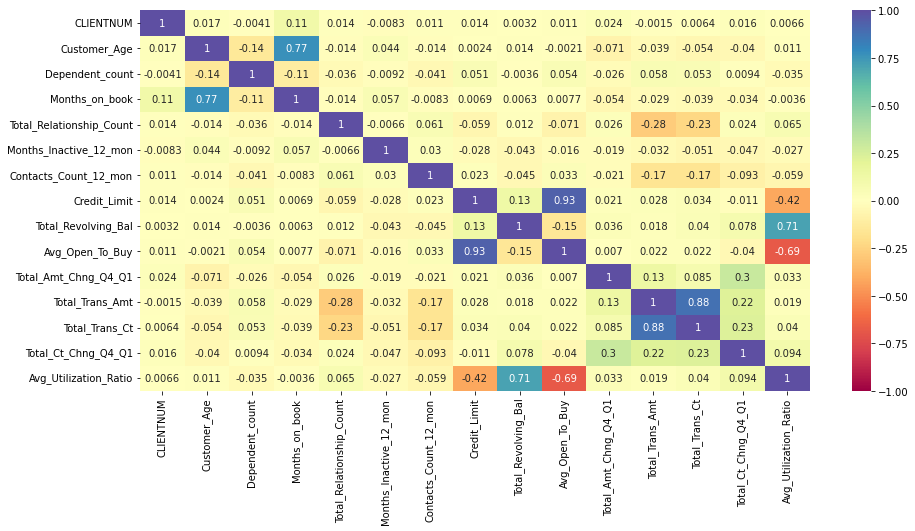

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* There is very high correlation between months_on_book and the customer_age
* There is the a very high correlation between Average open to buy and the credit limit
* There is a high correlation between theTotal_revolving balance and the Average_util_Ratio
* The is a very high correlation between the Total_Trns_Ct and the Total_Tran_Amount. This can be revised via the feature engineering

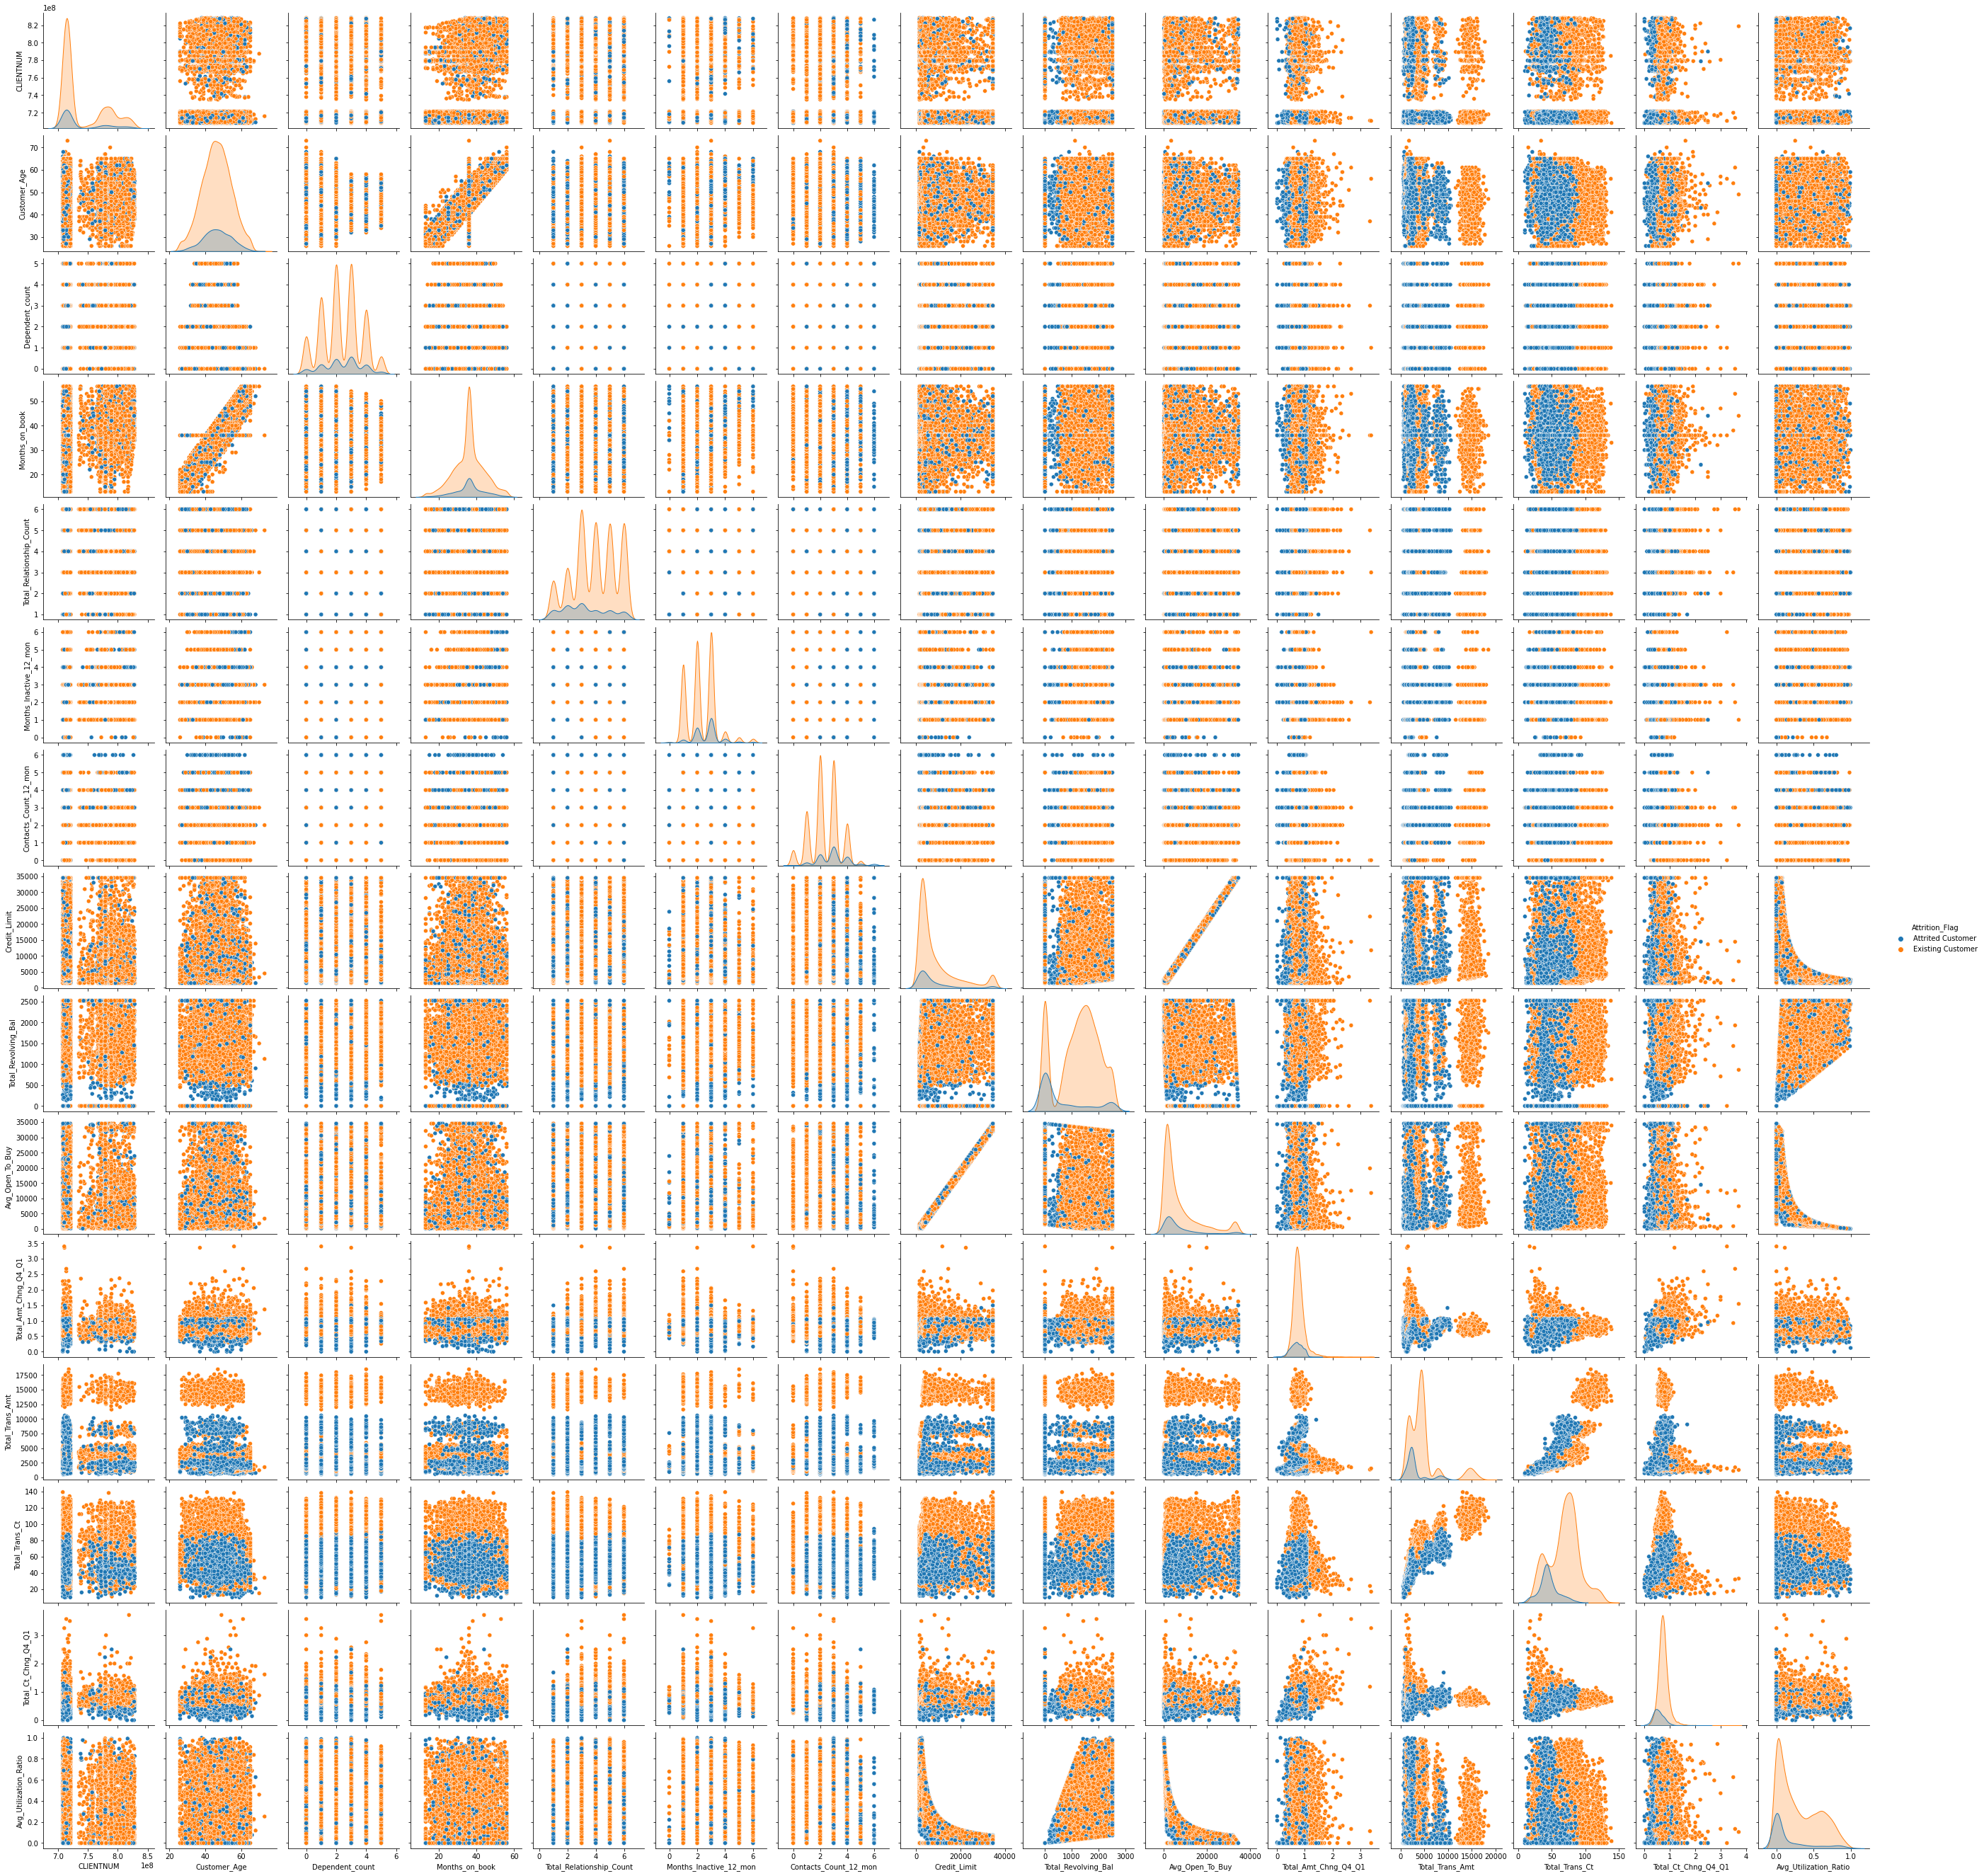

<IPython.core.display.Javascript object>

In [35]:
sns.pairplot(data=data, hue="Attrition_Flag")
plt.show()

### Attrition_Flag vs Numerical variables

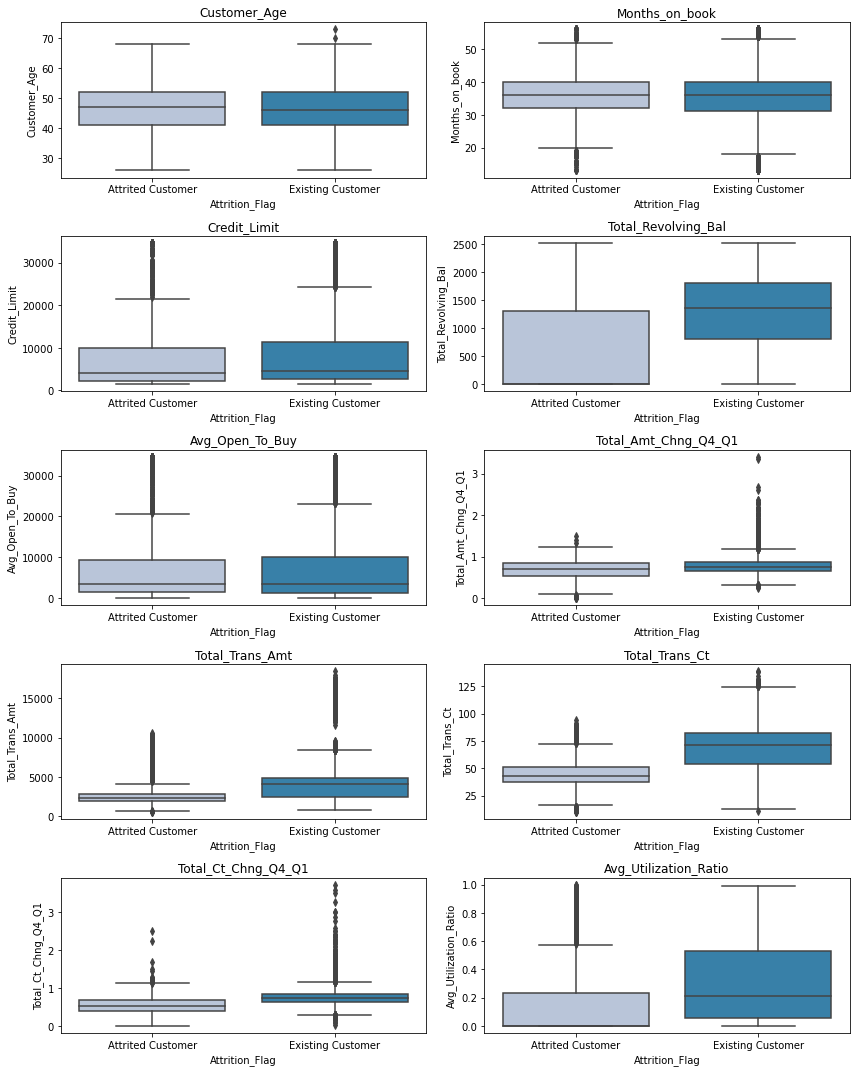

<IPython.core.display.Javascript object>

In [36]:
cols = data[
    [
        'Customer_Age',
        'Months_on_book',
        'Credit_Limit',
        'Total_Revolving_Bal',
        'Avg_Open_To_Buy',
        'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt',
        'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1',
        'Avg_Utilization_Ratio'
    ]
].columns.tolist()
plt.figure(figsize=(12, 15))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from orignal data) to get a better understanding**

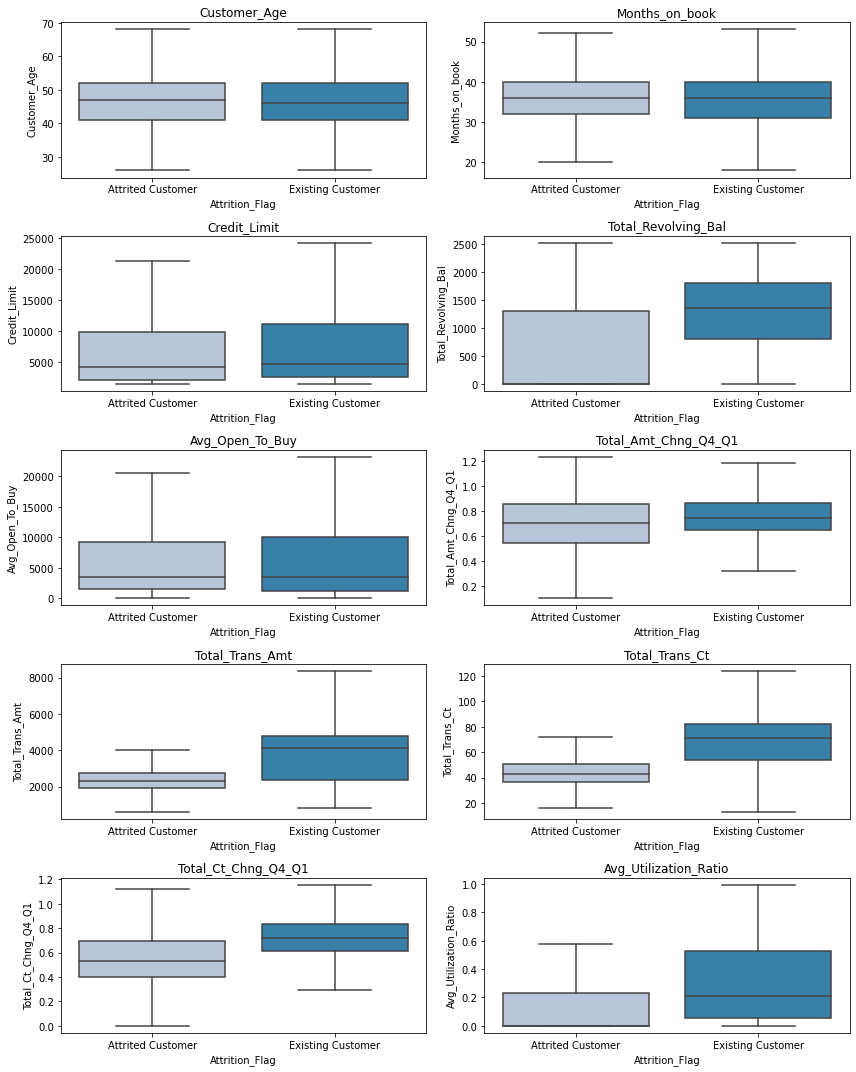

<IPython.core.display.Javascript object>

In [37]:
cols = data[
    [
        'Customer_Age',
        'Months_on_book',
        'Credit_Limit',
        'Total_Revolving_Bal',
        'Avg_Open_To_Buy',
        'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt',
        'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1',
        'Avg_Utilization_Ratio'
    ]
].columns.tolist()
plt.figure(figsize=(12, 15))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Weak Predictors can be identified as Customer Age, Month_on_Book
* Very Strong Preditors include Total_Trans_Ct and Total_Trans_Ct

## Bivariate Analysis (Categorical)

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    ).reindex([0, 1, "All"], axis=1)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    ).reindex([0, 1, "All"], axis=1)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Encoding of the Target Variable

In [39]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()

#data['Attrition_Flag'] = le.fit_transform(data['Attrition_Flag'])
data['Attrition_Flag'] = data['Attrition_Flag'].copy().apply(lambda x : 1 if x == 'Attrited Customer' else 0)

<IPython.core.display.Javascript object>

### Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


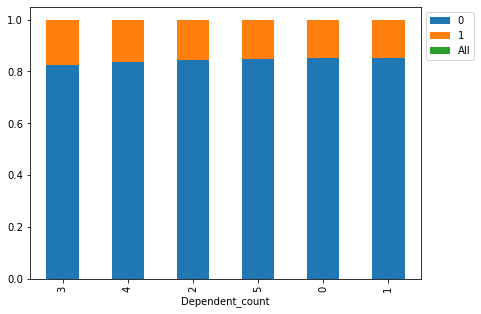

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* There is no signiificant difference between the Attrition power for different counts.
* Dependent_count is a bad predictor

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


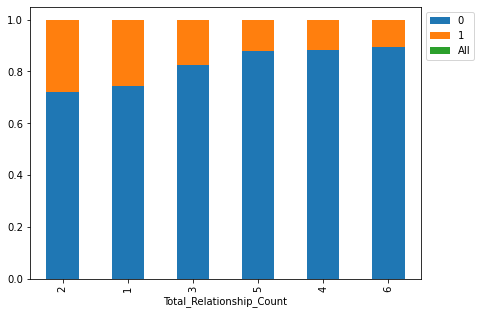

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* There is a signiificant difference between the Attrition power for different counts.
* Customers with few products are most likely to attrit

### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


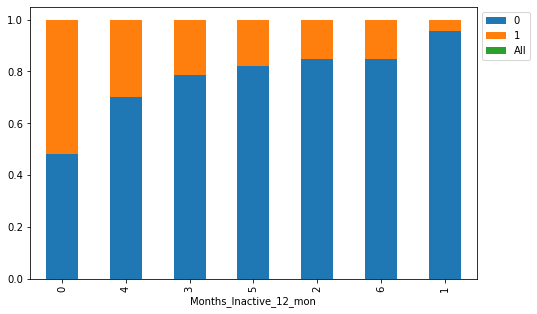

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* It does not seem reasonable for the greatest attrition rate coming from the most active customers
* This is recommended to be binned to the 1 month class

### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


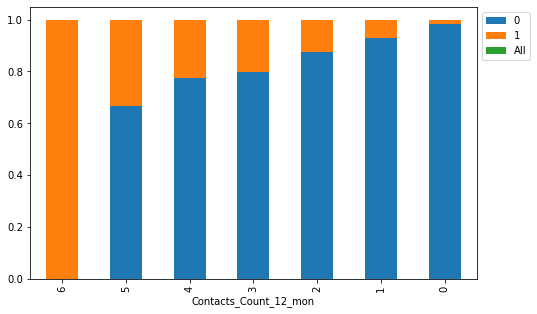

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* There seems to be an extreme bias towards customers who contact the bank 6 times. It should be binned to the lower category
* Customers always in in touch with the bank are most likely to attrit. This might signals dissatisfaction

### Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


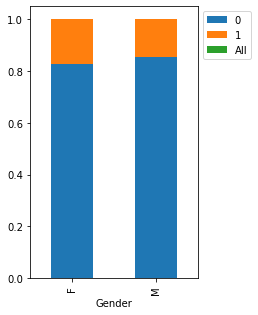

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(data, "Gender", "Attrition_Flag")

* There is no significant difference between the genders

### Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


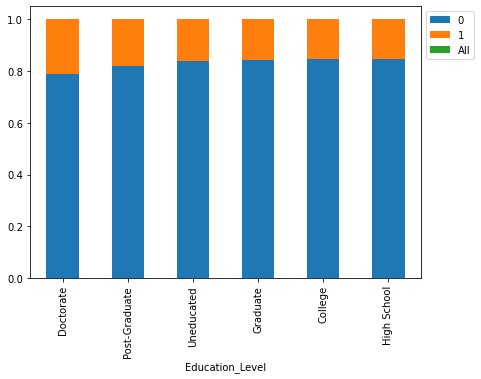

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Doctorate are the most likely to attrit and it is a good predictor.
* There is no significant difference between the attrition rates of the Graduate, College and High School Graduates

### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


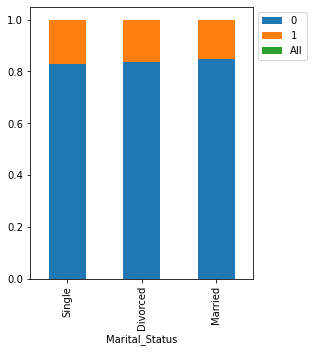

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* There is no significant difference between the attrition rate for the different Marital Status

### Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


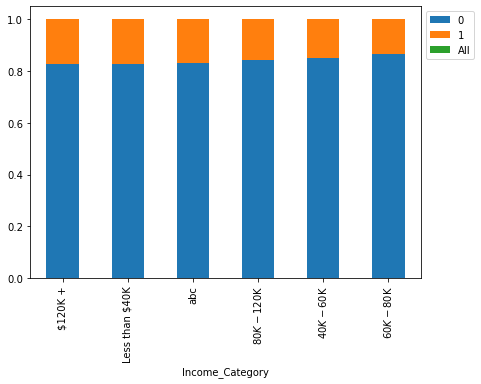

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* There is no significant difference between the attrition rates.
* The abc requires imputation
* The values can be converted to upper and lower limit

### Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


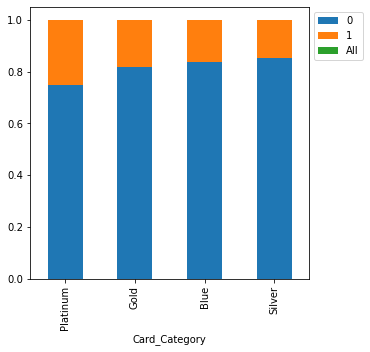

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* Customers using the platinum card are the most likely to attrict
* Card_Category is a good predictor

## Multivariate Analysis

### Attrition_Flag vs Total_Relationship_Count vs Total_Trans_Ct

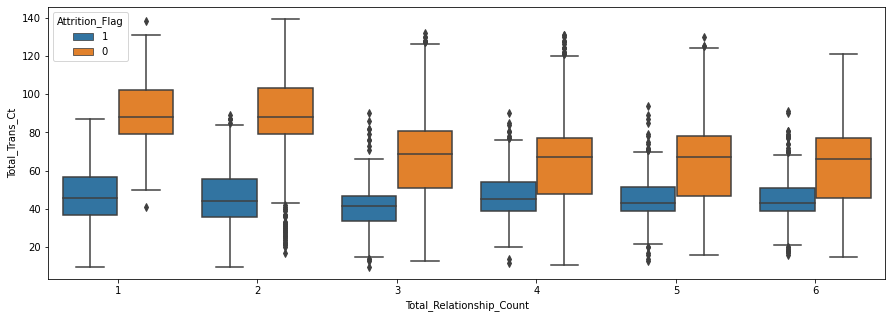

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Total_Relationship_Count'],data['Total_Trans_Ct'],hue=data['Attrition_Flag'])
plt.show()

* As expected the customers who rarely use their card will most likely attrict

### Attrition_Flag vs Months_Inactive_12_mon vs Total_Trans_Ct

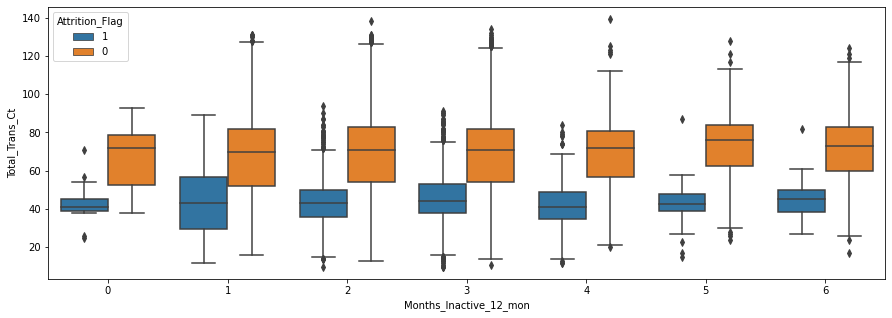

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Months_Inactive_12_mon'],data['Total_Trans_Ct'],hue=data['Attrition_Flag'])
plt.show()

* It is expected that the customers who do not frequently use their cards will have significantly higher number of transactions. However, this is not the case. It can be inferred that the customers who have high inactivity but high transactions make trageted or seasonal purchases. Those on lower side might use the card more actively for transactional purposes.
* This can be further investigated through the Average Utilization ratio

### Attrition_Flag vs Months_Inactive_12_mon vs Total_Revolving_Bal

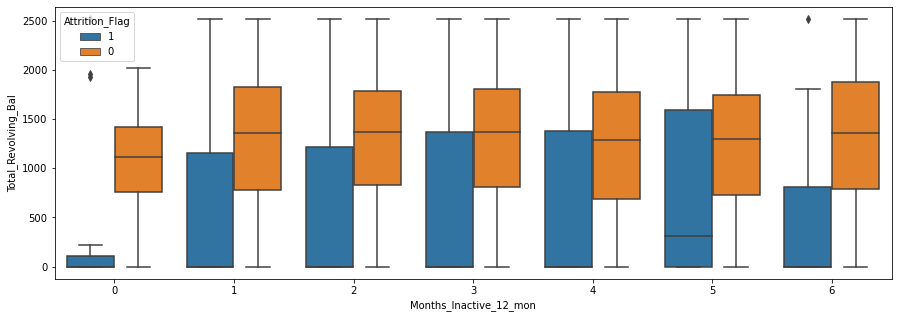

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Months_Inactive_12_mon'],data['Total_Revolving_Bal'],hue=data['Attrition_Flag'])
plt.show()

* As expected, the most inactive customers have a higher revolving balance
- As already observed, the most active customers (0) sharply differ from the next in  line (1)

### Attrition_Flag vs Card_Category vs Customer_Age

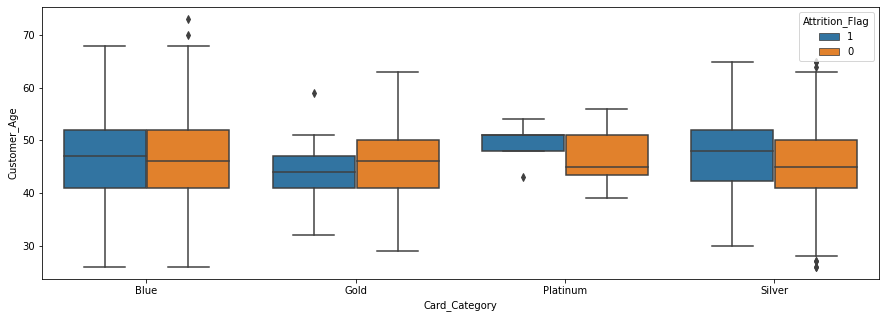

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Card_Category'],data['Customer_Age'],hue=data['Attrition_Flag'])
plt.show()

* The platinum customers that are leaving are in the upper age bracket

### Income _Category vs Card_Category vs Customer_Age

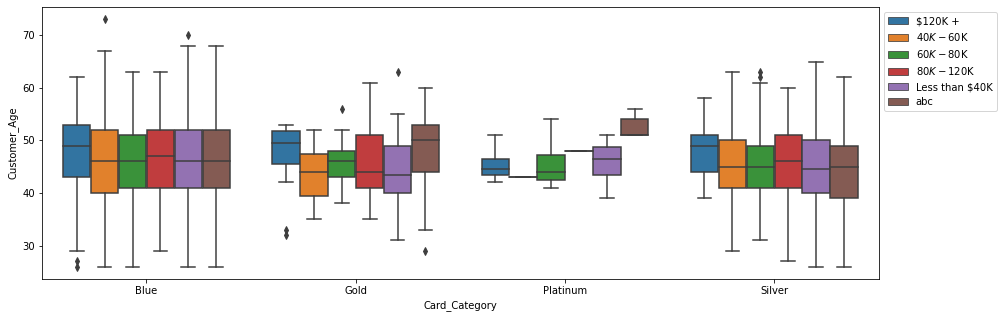

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Card_Category'],data['Customer_Age'],hue=data['Income_Category'])
plt.legend(
    loc="lower left",
    frameon=False,
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

* The platinum card was afforded by the low income earners

## Summary of EDA

- **`Customer_Age`**: The youngest customer is 26 years and the distribution is normal.
- **`Dependent_count`**: The highest number of dependants is 5 and the distribution is normal. Most the cutomers have two or three dependants. It might be a bad predictor
- **`Months_on_book`**: The customers have joined the bank between 13 to 56 months. The distribution is normal with a very significant peak. The outliers can be adjusted using a Logarithmic Scale
- **`Total_Relationship_Count`**: The maximum products held by the customers is 6. Most of the customers have three products
- **`Months_Inactive_12_mon`**: The customers have been inactive for a maximum of 6 months. Most of the customers have between 1 - 3 months
- **`Contacts_Count_12_mon`**: The customers have made contact with the bank for a maximum of 6 times. Most of the customers have contacted the bank two or three times
- **`Credit_Limit`**: This varied between \\$1,438.30 to \\$34,516.00 and the distribution is highly skewed to the right.
- **`Total_Revolving_Bal`**: Customers carrried over between \\$814.66 to \\$2,517.00. The distribution is normal skewed with a significant number of people with no Total_Revolving_Bal
- **`Avg_Open_To_Buy`**: Customers had between \\$3.00 to \\$34,516.00 available to spend and the distribution is highly skewed to the right.
- **`Total_Amt_Chng_Q4_Q1`**: This ratio varied between 0 and 3.40. The distribution is normal with a large amount of outliers
- **`Total_Trans_Amt`**: Transactions ranged between \\$510.00 to \\$18,484.00. The distribution is abnormally skewed with multiple peaks and should be transformed
- **`Total_Trans_Ct`**: Betwen 10 to 139 transactions were made in the last 12 months. The distribution is abnormally skewed but almost normal.
- **`Total_Ct_Chng_Q4_Q1`**: This ratio varied between 0 and 3.71
- **`Avg_Utilization_Ratio`**: This ratio varied between 0 and 1. However, it is highly skewed.
- **`Gender`**: Most of the customers are females
- **`Education_Level`**: Most of the customers are Married
- **`Marital_Status`**: Most of the Customers are married
- **`Income_Category`**: Most of the customers earn below 40k. Income_Category 'abc' should be treated as a missing value. This will be converted to lower and upper boundary numerical variables then dropped
- **`Card_Category`**: Most of the Customers use the blue card

**Bivariate**
* There is very high correlation between months_on_book and the customer_age
* There is the a very high correlation between Average open to buy and the credit limit
* There is a high correlation between the Total_revolving balance and the Average_util_Ratio
* The is a very high correlation between the Total_Trns_Ct and the Total_Tran_Amount. This can be revised via the feature engineering
* It does not seem reasonable for the greatest attrition rate coming from the most active customers
* This is recommended to be binned to the 1 month class
* There seems to be an extreme bias towards customers who contact the bank 6 times. It should be binned to the lower category
* Customers always in in touch with the bank are most likely to attrit. This might signals dissatisfaction

**Multivariate**
* It is expected that the customers who do not frequently use their cards will have significantly higher number of transactions. However, this is not the case. It can be inferred that the customers who have high inactivity but high transactions make trageted or seasonal purchases. Those on lower side might use the card more actively for transactional purposes.
* This can be further investigated through the Average Utilization ratio
* As expected, the most inactive customers have a higher revolving balance
* As already observed, the most active customers (0) sharply differ from the next in  line (1)
* The platinum card was afforded by the low income earners

**General**
- All skewed variables identified such as `Credit_Limit`, `Avg_Open_To_Buy`, and `Avg_Utilization_Ratio` should be transformed to the log scale
- Some features will be combined then dropped e.g `Total_Trans_Amt` and `Total_Trans_Ct`, `Credit_Limit` and `Avg_Open_To_Buy`, `Credit_Limit` and `Total_Revolving_Bal`
- The missing values should be imputed without introducing data leakage
- All numerical features should undergo standard scaling before Model building

# Data pre-processing

- Prepare the data for analysis
- Feature Engineering
- Missing value Treatment
- Outlier Treatment

## Preparing the Data for Analysis

### Checking Duplicates and Dropping the ID

In [54]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicates in the data

**Dropping the ID**

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [55]:
# Dropping column - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

### Log Scaling Skewed variables

In [56]:
log_col = ["Credit_Limit", "Avg_Open_To_Buy", "Avg_Utilization_Ratio", "Total_Trans_Ct"]

for i in log_col:
    data[i+"_log"] = np.log(data[i] + 1)

<IPython.core.display.Javascript object>

In [57]:
# Check updated Dataset
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0              0            45      M                3     High School   
1              0            49      F                5        Graduate   
2              0            51      M                3        Graduate   
3              0            40      F                4     High School   
4              0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0    12,691.000                  777       11,914.000                 1.335   
1     8,256.000                  864        7,392.000                 1.541   
2     3,418.000                    0        3,418.000                 2.594   
3     3,313.000                 2517          796.000                 1.405   
4     4,716.000                    0        4,716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Credit_Limit_log  Avg_Open_To_Buy_log  \
0                  0.061             9.449                9.386   
1                  0.105             9.019                8.908   
2                  0.000             8.137                8.137   
3                  0.760             8.106                6.681   
4                  0.000             8.459                8.459   

   Avg_Utilization_Ratio_log  Total_Trans_Ct_log  
0                      0.059               3.761  
1                      0.100               3.526  
2                      0.000               3.045  
3                      0.565               3.045  
4                      0.000               3.367

<IPython.core.display.Javascript object>

## Feature Engineering

### Avg_Trans_Amt

* This divides the Total transaction Amount by the number of transactions

In [58]:
data["Avg_Trans_Amt"] = data["Total_Trans_Amt"] / data["Total_Trans_Ct"]

<IPython.core.display.Javascript object>

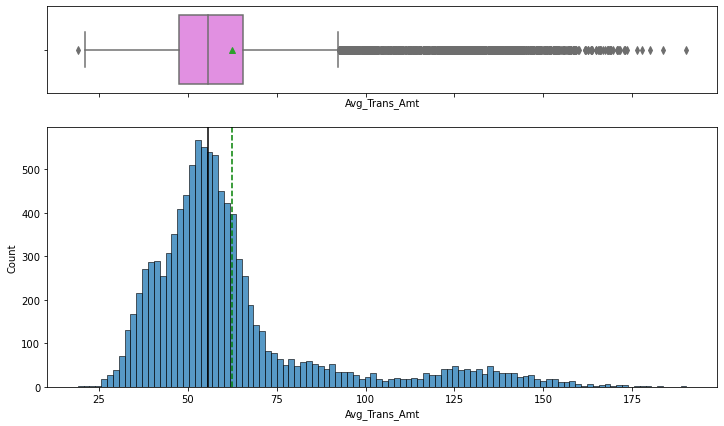

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(data, "Avg_Trans_Amt")

### Avg_Open_Ratio

* This divides the Avg Open Buy by the Credit Limit

In [60]:
data["Avg_Open_Ratio"] = data["Avg_Open_To_Buy"] / data["Credit_Limit"]

<IPython.core.display.Javascript object>

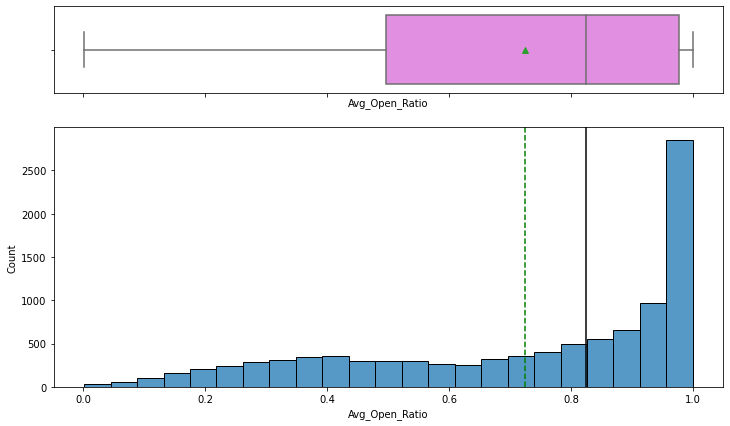

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(data, "Avg_Open_Ratio")

### Rev_Credit_Ratio

* This divides the Avg Open Buy by the Credit Limit

In [62]:
data["Rev_Credit_Ratio"] = data["Total_Revolving_Bal"] / data["Credit_Limit"]

<IPython.core.display.Javascript object>

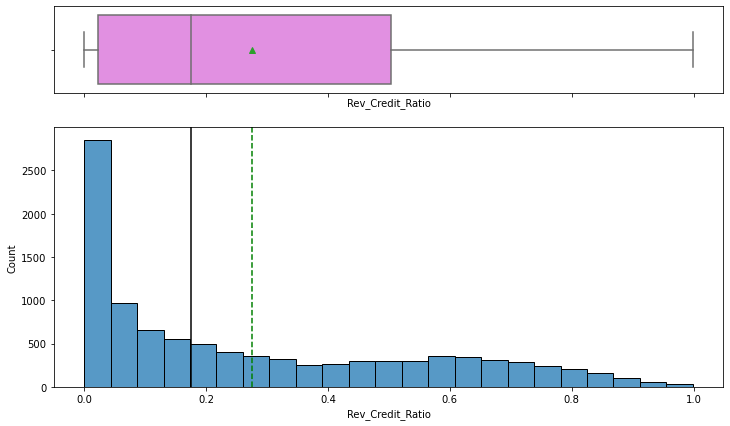

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(data, "Rev_Credit_Ratio")

### Log Scaling Skewed variables

In [64]:
log_col = ["Avg_Trans_Amt", "Avg_Open_Ratio", "Rev_Credit_Ratio"]

for i in log_col:
    data[i+"_log"] = np.log(data[i] + 1)

<IPython.core.display.Javascript object>

### Updated Correlation Plot

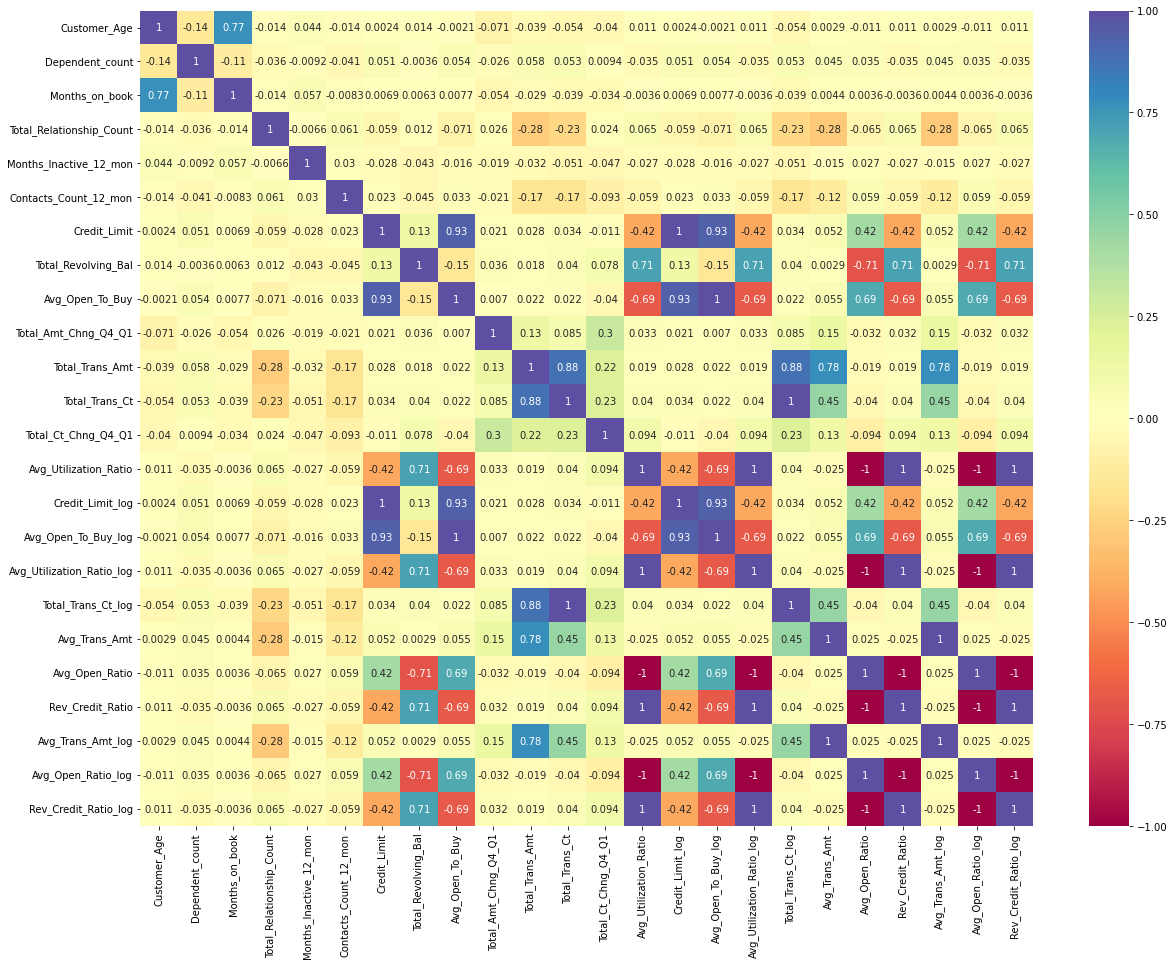

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [66]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_log', 'Avg_Open_To_Buy_log', 'Avg_Utilization_Ratio_log',
       'Total_Trans_Ct_log', 'Avg_Trans_Amt', 'Avg_Open_Ratio',
       'Rev_Credit_Ratio', 'Avg_Trans_Amt_log', 'Avg_Open_Ratio_log',
       'Rev_Credit_Ratio_log'],
      dtype='object')

<IPython.core.display.Javascript object>

**Dropping the Redundant Columns**

In [67]:
del_col = ["Total_Trans_Ct", 'Avg_Open_Ratio', 'Avg_Open_Ratio_log', 'Credit_Limit', 'Credit_Limit_log',
          'Avg_Open_To_Buy_log', 'Avg_Utilization_Ratio', 'Rev_Credit_Ratio', 'Rev_Credit_Ratio_log', 'Avg_Trans_Amt',
          ]

<IPython.core.display.Javascript object>

In [68]:
# Dropping column
data.drop(columns=del_col, inplace=True)

<IPython.core.display.Javascript object>

### Correlation Plot after deleting redundant variables

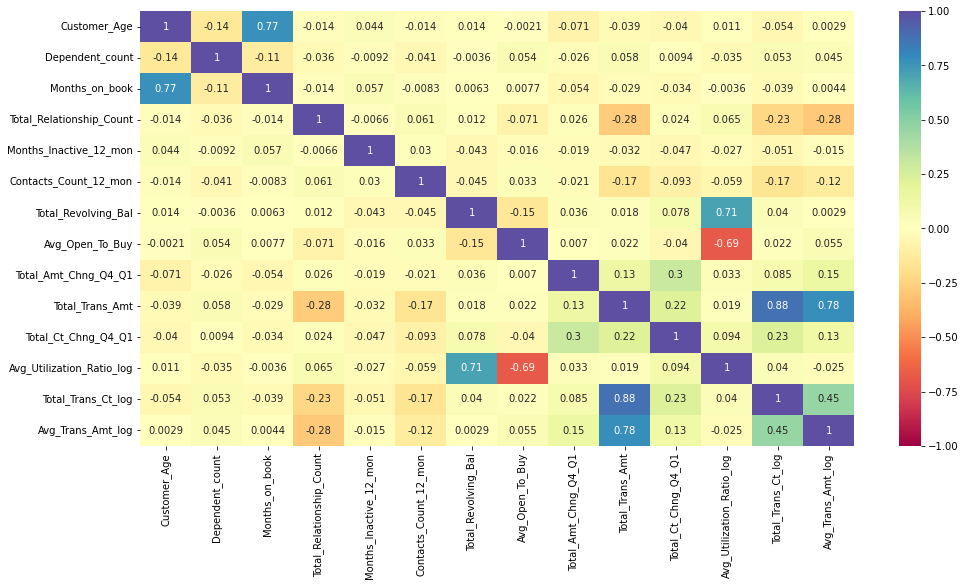

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

### Fixing Observed data Bias in **`Months_Inactive_12_mon`** and **`Contacts_Count_12_mon`**

#### Months_Inactive_12_mon

* An abnormal behaviour was observed with this variable. The 0 Month will be combined with the 1 Month

In [70]:
#Set month as 1
print("Before transformation/Binning")
print(data.Months_Inactive_12_mon.value_counts())
print("-" * 30)
      
data.Months_Inactive_12_mon[data.Months_Inactive_12_mon == 0] = 1

print("After transformation/Binning")
print(data.Months_Inactive_12_mon.value_counts())      

Before transformation/Binning
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64
------------------------------
After transformation/Binning
3    3846
2    3282
1    2262
4     435
5     178
6     124
Name: Months_Inactive_12_mon, dtype: int64


<IPython.core.display.Javascript object>

#### Contacts_Count_12_mon

* An abnormal behaviour was observed with this variable. The extreme bias towards 6 months contact will be adjusted as this will be combined with the 5th month

In [71]:
#Set month as 1
print("Before transformation/Binning")
print(data.Contacts_Count_12_mon.value_counts())
print("-" * 30)
      
data.Contacts_Count_12_mon[data.Contacts_Count_12_mon == 6] = 5

print("After transformation/Binning")
print(data.Contacts_Count_12_mon.value_counts())      

Before transformation/Binning
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64
------------------------------
After transformation/Binning
3    3380
2    3227
1    1499
4    1392
0     399
5     230
Name: Contacts_Count_12_mon, dtype: int64


<IPython.core.display.Javascript object>

### Income_Category

* We have an abnormal class abc which will be transformed to null

In [72]:
#Set abc as Null
print("Before transformation/Binning")
print(data.Income_Category.value_counts())
print("-" * 30)
      
data.Income_Category[data.Income_Category == 'abc'] = np.NaN

print("After transformation/Binning")
print(data.Income_Category.value_counts(dropna=False))      

Before transformation/Binning
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
After transformation/Binning
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
abc                  0
Name: Income_Category, dtype: int64


<IPython.core.display.Javascript object>

### Encoding of Variables

#### Income_Category

In [73]:
original_income = data['Income_Category'].copy()
mask_income = data['Income_Category'].isnull()
encode_income = LabelEncoder().fit(data['Income_Category']) # Fit Encoder
data['Income_Category'] = encode_income.transform(data['Income_Category'])
data['Income_Category'] = data['Income_Category'][~mask_income]

<IPython.core.display.Javascript object>

#### Education_Level

In [74]:
original_edu = data['Education_Level'].copy()
mask_edu = data['Education_Level'].isnull()
encode_edu = LabelEncoder().fit(data['Education_Level']) # Fit Encoder
data['Education_Level'] = encode_edu.transform(data['Education_Level'])
data['Education_Level'] = data['Education_Level'][~mask_edu]

<IPython.core.display.Javascript object>

#### Marital_Status

In [75]:
original_mar = data['Marital_Status'].copy()
mask_mar = data['Marital_Status'].isnull()
encode_mar = LabelEncoder().fit(data['Marital_Status']) # Fit Encoder
data['Marital_Status'] = encode_mar.transform(data['Marital_Status'])
data['Marital_Status'] = data['Marital_Status'][~mask_mar]

<IPython.core.display.Javascript object>

In [76]:
data.isnull().sum()

Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level              1519
Marital_Status                749
Income_Category              1112
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio_log       0
Total_Trans_Ct_log              0
Avg_Trans_Amt_log               0
dtype: int64

<IPython.core.display.Javascript object>

* Variables have been properly encoded with the missing values still intact
* The data is well prepared for KNN inputation

### Summary of Feature Engineering

* Some variables were created and others were dropped
* Income category cannot be fully transformed until the missing value imputation is completed
* Label Encoding was applied to missing columns to preceede Missing value treatment

## Train - Test Split

In [77]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [78]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

## Missing Value Treatment

In [79]:
print("---Training data---")
print(X_train.isnull().sum())

print("-" * 30)

print("---Validation data---")
print(X_val.isnull().sum())

print("-" * 30)

print("---Testing data---")
print(X_test.isnull().sum())

---Training data---
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level              928
Marital_Status               457
Income_Category              654
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio_log      0
Total_Trans_Ct_log             0
Avg_Trans_Amt_log              0
dtype: int64
------------------------------
---Validation data---
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level              294
Marital_Status               140
Income_Category              221
Card_Category                  0
Months_on_book                 0
Total_Relationship_Coun

<IPython.core.display.Javascript object>

### KNN inputation

In [80]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Income_Category",
    "Education_Level",
    "Marital_Status",
]

<IPython.core.display.Javascript object>

In [81]:
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [82]:
print("---Training data---")
print(X_train.isnull().sum())

print("-" * 30)

print("---Validation data---")
print(X_val.isnull().sum())

print("-" * 30)

print("---Testing data---")
print(X_test.isnull().sum())

---Training data---
Customer_Age                 0
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Amt_Chng_Q4_Q1         0
Total_Trans_Amt              0
Total_Ct_Chng_Q4_Q1          0
Avg_Utilization_Ratio_log    0
Total_Trans_Ct_log           0
Avg_Trans_Amt_log            0
dtype: int64
------------------------------
---Validation data---
Customer_Age                 0
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_

<IPython.core.display.Javascript object>

* All missing values have been replaced

### Rectification of the Label Encoding

The numerical labels will be inversed into Categorical

In [83]:
# Return Features to integer from float
# Train
for i in reqd_col_for_impute:
    X_train[i] = X_train[i].astype('int64')

# Validation
for i in reqd_col_for_impute:
    X_val[i] = X_val[i].astype('int64')
    
# Test
for i in reqd_col_for_impute:
    X_test[i] = X_test[i].astype('int64')     

<IPython.core.display.Javascript object>

#### Income_Category

In [84]:
# Cobvert target label to numerical Data
X_train['Income_Category'] = encode_income.inverse_transform(X_train['Income_Category'])
X_val['Income_Category'] = encode_income.inverse_transform(X_val['Income_Category'])
X_test['Income_Category'] = encode_income.inverse_transform(X_test['Income_Category'])

<IPython.core.display.Javascript object>

#### Education_Level

In [85]:
# Cobvert target label to numerical Data
X_train['Education_Level'] = encode_edu.inverse_transform(X_train['Education_Level'])
X_val['Education_Level'] = encode_edu.inverse_transform(X_val['Education_Level'])
X_test['Education_Level'] = encode_edu.inverse_transform(X_test['Education_Level'])

<IPython.core.display.Javascript object>

#### Marital_Status

In [86]:
# Cobvert target label to numerical Data
X_train['Marital_Status'] = encode_mar.inverse_transform(X_train['Marital_Status'])
X_val['Marital_Status'] = encode_mar.inverse_transform(X_val['Marital_Status'])
X_test['Marital_Status'] = encode_mar.inverse_transform(X_test['Marital_Status'])

<IPython.core.display.Javascript object>

In [87]:
X_train.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
800             40      M                2         College         Single   
498             44      M                1        Graduate        Married   
4356            48      M                4     High School        Married   
407             41      M                2        Graduate       Divorced   
8728            46      M                4     High School       Divorced   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
800          $120K +          Blue              21                         6   
498     $80K - $120K          Blue              34                         6   
4356    $80K - $120K          Blue              36                         5   
407      $60K - $80K        Silver              36                         6   
8728     $40K - $60K        Silver              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
800                        4                      3                 1602   
498                        2                      0                 1895   
4356                       1                      2                 2517   
407                        2                      0                    0   
8728                       2                      3                 1356   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
800        18,454.000                 0.466             1687   
498           990.000                 0.387             1366   
4356        4,281.000                 0.873             4327   
407        27,000.000                 0.610             1209   
8728       13,678.000                 0.754             7737   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio_log  Total_Trans_Ct_log  \
800                 0.533                      0.077               3.850   
498                 0.632                      0.505               3.466   
4356                0.881                      0.315               4.382   
407                 0.300                      0.000               3.689   
8728                0.750                      0.086               4.443   

      Avg_Trans_Amt_log  
800               3.629  
498               3.808  
4356              4.021  
407               3.466  
8728              4.534

<IPython.core.display.Javascript object>

## Outlier Treatment

In [88]:
Q1 = X_train.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = X_train.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

<IPython.core.display.Javascript object>

**Display percentage outliers**

In [89]:
((X_train.select_dtypes(include=['float64','int64'])<lower) | (X_train.select_dtypes(include=['float64','int64'])>upper)).sum()/len(X_train)*100

Customer_Age                0.016
Dependent_count             0.000
Months_on_book              5.827
Total_Relationship_Count    0.000
Months_Inactive_12_mon      2.947
Contacts_Count_12_mon       6.255
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.317
Total_Amt_Chng_Q4_Q1        4.016
Total_Trans_Amt             8.593
Total_Ct_Chng_Q4_Q1         3.951
Avg_Utilization_Ratio_log   0.000
Total_Trans_Ct_log          0.724
Avg_Trans_Amt_log           9.695
dtype: float64

<IPython.core.display.Javascript object>

In [90]:
# Check extreme values
X_train.sort_values(by=["Avg_Trans_Amt_log"],ascending = False).head(5)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
9461            34      M                3     High School        Married   
9409            34      M                2     High School         Single   
9977            41      F                3      Uneducated        Married   
9783            51      F                1     High School        Married   
9994            53      M                0        Graduate         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
9461    $80K - $120K        Silver              21                         1   
9409     $60K - $80K          Blue              36                         2   
9977  Less than $40K          Blue              30                         1   
9783  Less than $40K          Blue              38                         1   
9994     $60K - $80K          Blue              35                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
9461                       2                      3                    0   
9409                       3                      2                 2517   
9977                       2                      3                    0   
9783                       1                      2                 1171   
9994                       1                      3                  596   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
9461       34,516.000                 0.794             9177   
9409        7,202.000                 0.906             9183   
9977        9,491.000                 1.056             9061   
9783        4,018.000                 0.732            16563   
9994       17,125.000                 0.694            14409   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio_log  Total_Trans_Ct_log  \
9461                1.083                      0.000               3.932   
9409                0.700                      0.230               3.951   
9977                1.684                      0.000               3.951   
9783                0.741                      0.204               4.554   
9994                0.844                      0.033               4.431   

      Avg_Trans_Amt_log  
9461              5.218  
9409              5.199  
9977              5.186  
9783              5.177  
9994              5.163

<IPython.core.display.Javascript object>

* Although there are outliers, it does not translate to an extreme value
* Outlier treatment not required

## Preparing the Data for Modelling

* Dummy Variables Creation
* Percentage of Classes

### Dummy Variables Creation

In [91]:
print("Shape before creating the dummy variables")
print(X_train.shape, X_val.shape, X_test.shape)
print("-" * 30)

X_train = pd.get_dummies(X_train, drop_first=True) # X_train
X_val = pd.get_dummies(X_val, drop_first=True) # X_val
X_test = pd.get_dummies(X_test, drop_first=True) # X_test

print("Shape after creating the dummy variables")
print(X_train.shape, X_val.shape, X_test.shape)

Shape before creating the dummy variables
(6075, 19) (2026, 19) (2026, 19)
------------------------------
Shape after creating the dummy variables
(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

In [92]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


<IPython.core.display.Javascript object>

# Model building

## Introduction

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attrit and does not - Loss of resources
2. Predicting a customer will not attrit but does - Loss of opportunity

#### Which case is more important? 
* Predicting a customer will not attrit but does i.e. losing on a potential customer which comes at a great loss for the bank.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [94]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
cv_score = [] # Empty list to store all model's mean CV scores
cv_std = [] # Empty list to store all model's CV Standard Deviation


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    cv_score.append(cv_result.mean() * 100)
    cv_std.append(cv_result.std() * 100)
    names.append(name + " base")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))


Cross-Validation Performance:

Logistic Regression: 36.06279434850863, 2.0121579974179546%
Random forest: 78.58084772370488, 2.694346719425409%
GBM: 82.27315541601257, 1.4150557782253441%
Adaboost: 81.14338042909472, 2.7051044043316312%
Xgboost: 86.06227106227105, 2.675898763668243%
dtree: 76.53270538984825, 5.289039741381906%


<IPython.core.display.Javascript object>

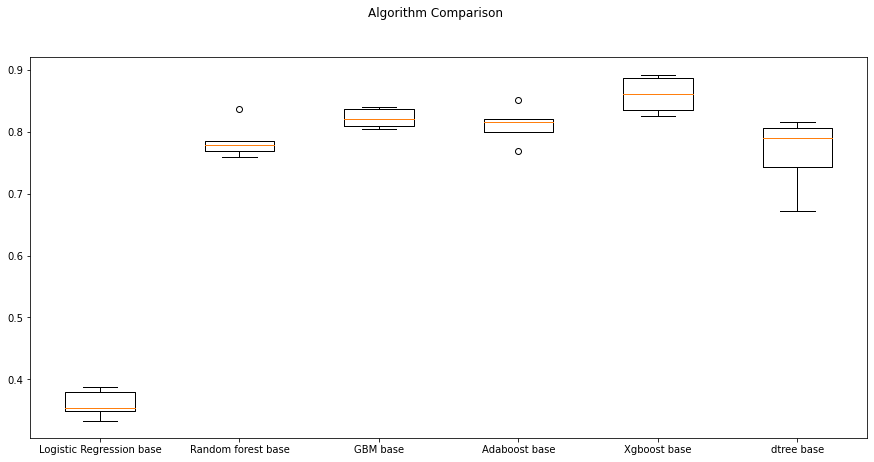

<IPython.core.display.Javascript object>

In [95]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Training Performance

In [96]:
print("\n" "Training Performance:" "\n")

score = []

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    score.append(scores)
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 34.73360655737705
Random forest: 100.0
GBM: 88.42213114754098
Adaboost: 83.50409836065575
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

## Summary (Base Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Gradient Boost
- The boxplot shows that the performance of xgboost is consistent with no outlier. However, Adaboost seems to be the most consistent.
- So far, the Performance of Xgboost and Gradient Boost is highest on cross-validation.

# Model building - Oversampled data

## Oversampling train data using SMOTE

In [97]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [98]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
cv_score_over = [] # Empty list to store all model's mean CV scores
cv_std_over = [] # Empty list to store all model's mean CV scores


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    cv_score_over.append(cv_result.mean() * 100)
    cv_std_over.append(cv_result.std() * 100)
    names_over.append(name + " over")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))


Cross-Validation Performance:

Logistic Regression: 75.93771286728627, 3.3643653438183283%
Random forest: 98.47031884392618, 0.3196625309159669%
GBM: 97.39179126017433, 0.41343466922429256%
Adaboost: 96.25426696684562, 0.5757899780864686%
Xgboost: 98.509476803479, 0.31877155576856375%
dtree: 95.48938790432757, 0.5106923330500208%


<IPython.core.display.Javascript object>

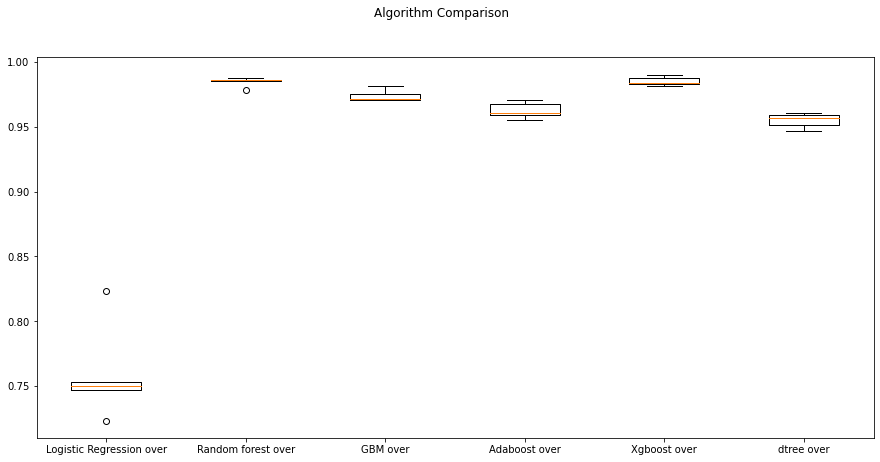

<IPython.core.display.Javascript object>

In [99]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

## Training Performance

In [100]:
print("\n" "Training Performance:" "\n")

score_over = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    score_over.append(scores)
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 73.81839576387527
Random forest: 100.0
GBM: 98.29378309472445
Adaboost: 96.52873112374975
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

## Summary (Oversampled Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Random Forest Classifier
- The boxplot shows that the performance of xgboost is consistent as well of that of the random forest classifier.
- So far, the Performance of Xgboost and Random Forest is highest on cross-validation.

# Model building - Undersampled data

## Undersampling train data using Random Under Sampler

In [101]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

## Stratified K-Folds cross-validation

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [102]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
cv_score_un = [] # Empty list to store all model's mean CV scores
cv_std_un = [] # Empty list to store all model's mean CV scores


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_un:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result)
    cv_score_un.append(cv_result.mean() * 100)
    cv_std_un.append(cv_result.std() * 100)
    names_un.append(name + " under")
    print("{}: {}, {}%".format(name, cv_result.mean() * 100, cv_result.std() * 100))


Cross-Validation Performance:

Logistic Regression: 76.64102564102564, 2.1702670737947525%
Random forest: 94.05808477237049, 1.7914664410843506%
GBM: 94.26321297749868, 1.1366755188125552%
Adaboost: 92.62375719518576, 1.9042719078085142%
Xgboost: 95.39089481946625, 1.1149725572313867%
dtree: 88.93354264782836, 0.8437373567306273%


<IPython.core.display.Javascript object>

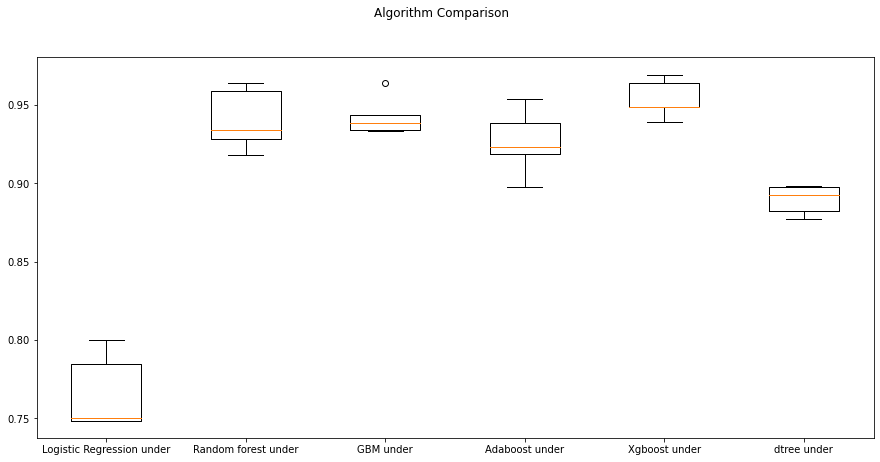

<IPython.core.display.Javascript object>

In [103]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

## Training Performance

In [104]:
print("\n" "Training Performance:" "\n")

score_un = []

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    score_un.append(scores)
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 74.2827868852459
Random forest: 100.0
GBM: 98.15573770491804
Adaboost: 94.4672131147541
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

## Summary (Undersampled Models)

- We can see that Xgboost is giving the highest cross-validated recall followed by Gradient Boost
- The boxplot shows that the performance of xgboost is consistent with no outlier. Gradient Boost follows closely without outliers.
- So far, the Performance of Xgboost and Gradient Boost is highest on cross-validation.

# Hyperparameter tuning using random search

## Comparing Model Performance

So far, 18 models have been built. This section will compare the performance of all the models to choose the best three models that will undergo hyperparameter tuning

In [105]:
# Model performance comparison

model_comp = pd.DataFrame(list(zip(names + names_over + names_un, 
                                   score + score_over + score_un,
                                   cv_score + cv_score_over + cv_score_un,
                                   cv_std + cv_std_over + cv_std_un)
                              ),
                          
               columns =['Name', 'Training Score', 'CV Score', 'Standard Deviation'])

print("Model performance comparison:")

# CV score has to be very high while STD has to be very low
# New variables Alpha compares all the models
# The lower the Alpha, the better the model

# Creation of Alpha
model_comp['Alpha'] = model_comp['Standard Deviation']/model_comp['CV Score']

# Sort by Alpha and CV Score
model_comp.sort_values(by = ['CV Score', 'Alpha'], ascending = [False, True])

Model performance comparison:


Name  Training Score  CV Score  Standard Deviation  \
10               Xgboost over         100.000    98.509               0.319   
7          Random forest over         100.000    98.470               0.320   
8                    GBM over          98.294    97.392               0.413   
9               Adaboost over          96.529    96.254               0.576   
11                 dtree over         100.000    95.489               0.511   
16              Xgboost under         100.000    95.391               1.115   
14                  GBM under          98.156    94.263               1.137   
13        Random forest under         100.000    94.058               1.791   
15             Adaboost under          94.467    92.624               1.904   
17                dtree under         100.000    88.934               0.844   
4                Xgboost base         100.000    86.062               2.676   
2                    GBM base          88.422    82.273               1.415   
3               Adaboost base          83.504    81.143               2.705   
1          Random forest base         100.000    78.581               2.694   
12  Logistic Regression under          74.283    76.641               2.170   
5                  dtree base         100.000    76.533               5.289   
6    Logistic Regression over          73.818    75.938               3.364   
0    Logistic Regression base          34.734    36.063               2.012   

    Alpha  
10  0.003  
7   0.003  
8   0.004  
9   0.006  
11  0.005  
16  0.012  
14  0.012  
13  0.019  
15  0.021  
17  0.009  
4   0.031  
2   0.017  
3   0.033  
1   0.034  
12  0.028  
5   0.069  
6   0.044  
0   0.056

<IPython.core.display.Javascript object>

### Summary (All Models)

- We can see that Xgboost on oversampling is giving the highest cross-validated recall followed by Random Forest on Oversampling.
- XGboost on oversampling outperformed all other models in CV Score and stability.
- Although Gradient Boost has a slightly lower CV score than Random Forest, It is nire stable than random forest.
- So far, the Performance of Xgboost , Random Forest, and Gradient Boost is highest on cross-validation.

## Hyperparameter Tuning

**We will tune Xgboost, Random Forest and Gradient Boost oversampled models using RandomizedSearchCV. We will also compare the performance and time taken by these three methods**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [106]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [107]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Gradient Boost

In [108]:
%%time

# Choose the type of classifier. 
model = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=75, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'max_depth': 10} with CV score=0.9772535550039446:
Wall time: 11min 40s


<IPython.core.display.Javascript object>

In [109]:
# building model with best parameters
gb_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train_over,y_train_over)

GradientBoostingClassifier(max_depth=10, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

In [110]:
# Calculating different metrics on train set
gb_grid_train = model_performance_classification_sklearn(
    gb_tuned, X_train_over,y_train_over
)
print("Training performance:")
gb_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [111]:
# Calculating different metrics on validation set
gb_grid_val = model_performance_classification_sklearn(gb_tuned, X_val, y_val)
print("Validation performance:")
gb_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.962   0.920      0.852 0.885

<IPython.core.display.Javascript object>

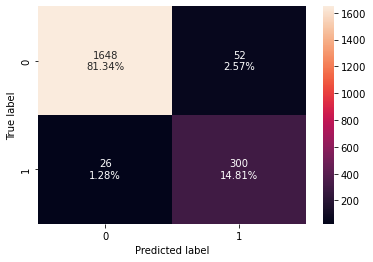

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix
confusion_matrix_sklearn(gb_tuned, X_val, y_val)

* The model is slightly overfitting

### Random Forest Classifier

In [113]:
%%time

# Choose the type of classifier. 
model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {  
        "n_estimators": [51, 110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7, 0.8, 0.9,'log2','auto'],
        "max_samples": [0.7, 0.8, 0.9,None],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=75, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 251, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 0.7} with CV score=0.9762729704246762:
Wall time: 17min 47s


<IPython.core.display.Javascript object>

In [114]:
# building model with best parameters
rf_estimator = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=2,
                       n_estimators=251, random_state=1)

<IPython.core.display.Javascript object>

In [115]:
# Calculating different metrics on train set
rf_estimator_grid_train = model_performance_classification_sklearn(
    rf_estimator, X_train_over,y_train_over
)
print("Training performance:")
rf_estimator_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.959   0.920      0.997 0.957

<IPython.core.display.Javascript object>

In [116]:
# Calculating different metrics on validation set
rf_estimator_grid_val = model_performance_classification_sklearn(rf_estimator, X_val, y_val)
print("Validation performance:")
rf_estimator_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.968   0.877      0.920 0.898

<IPython.core.display.Javascript object>

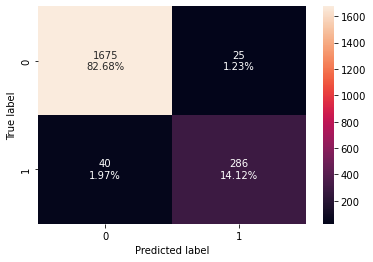

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

* The model is slightly overfitting

### XGBoost

In [118]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9986274509803922:
Wall time: 1min 56s


<IPython.core.display.Javascript object>

In [119]:
# building model with best parameters
xgb_tuned2 = xgb_tuned2.best_estimator_

# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [120]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over,y_train_over
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.903   0.990      0.843 0.911

<IPython.core.display.Javascript object>

In [121]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.838   0.975      0.498 0.660

<IPython.core.display.Javascript object>

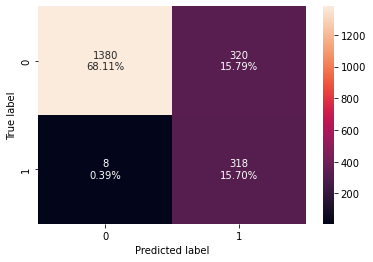

<IPython.core.display.Javascript object>

In [122]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

* The model is rightly fitted

# Model Performances

## Comparing best three tuned Models

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gb_grid_train.T,
        rf_estimator_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Random Forest Tuned with Random search",
    "Xgboost Tuned with Random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boost Tuned with Random search  \
Accuracy                                     1.000   
Recall                                       1.000   
Precision                                    1.000   
F1                                           1.000   

           Random Forest Tuned with Random search  \
Accuracy                                    0.959   
Recall                                      0.920   
Precision                                   0.997   
F1                                          0.957   

           Xgboost Tuned with Random search  
Accuracy                              0.903  
Recall                                0.990  
Precision                             0.843  
F1                                    0.911

<IPython.core.display.Javascript object>

In [124]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gb_grid_val.T,
        rf_estimator_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Random Forest Tuned with Random search",
    "Xgboost Tuned with Random search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient Boost Tuned with Random search  \
Accuracy                                     0.962   
Recall                                       0.920   
Precision                                    0.852   
F1                                           0.885   

           Random Forest Tuned with Random search  \
Accuracy                                    0.968   
Recall                                      0.877   
Precision                                   0.920   
F1                                          0.898   

           Xgboost Tuned with Random search  
Accuracy                              0.838  
Recall                                0.975  
Precision                             0.498  
F1                                    0.660

<IPython.core.display.Javascript object>

- The xgboost model tuned using Grid search is giving the best validation recall of 0.985 but it has the low values of train and validation precision.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

## Best Model Performance on the test set

In [125]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.842   0.988      0.504 0.667

<IPython.core.display.Javascript object>

- The performance on test data is generalised

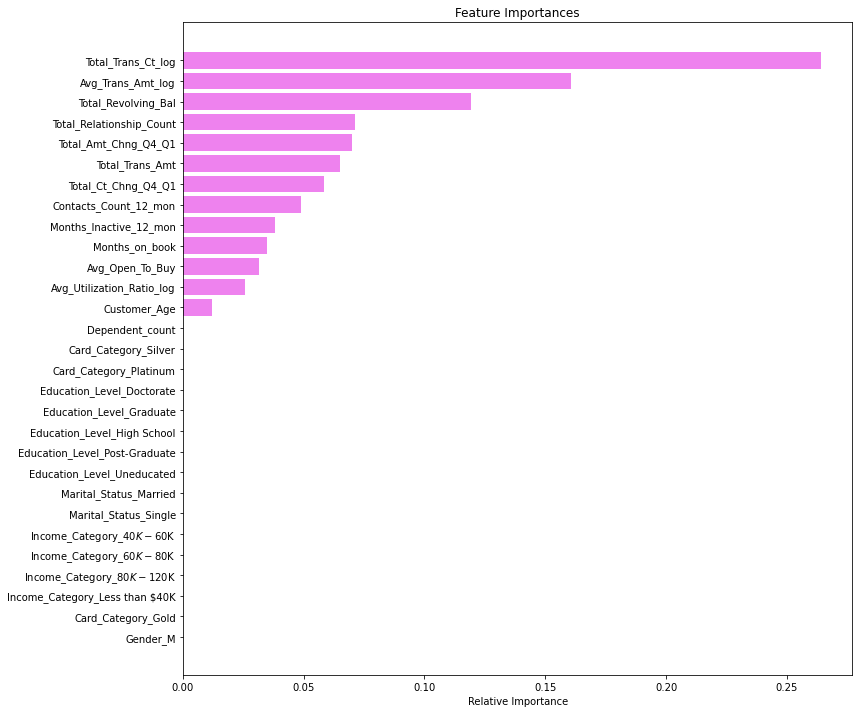

<IPython.core.display.Javascript object>

In [126]:
feature_names = X_train.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction in the last 12 months is the most important feature, followed by the engineered Average Transaction amount (Transaction rate) in the last 12 months.

# Productionize the model

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 3 different pipelines, one for knn columns, another for numerical columns and one for categorical columns
- For encoded columns, we will do missing value imputation as pre-processing using KNN inputer
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [127]:
# creating a list of numerical variables
numerical_features = ['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio_log',
 'Total_Trans_Ct_log',
 'Avg_Trans_Amt_log'
]

KNN_features = ['Education_Level', 'Marital_Status', 'Income_Category']

# creating a transformer for encoded categorical variables, which will apply KNN imputer on the encoded variables
KNN_transformer = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=5))])

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = ['Gender', 'Card_Category', 'Education_Level', 'Marital_Status', 'Income_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("knn", KNN_transformer, KNN_features),
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [128]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [129]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [130]:
%%time

# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=1,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=3,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Wall time: 2.35 s


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knn',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                         

<IPython.core.display.Javascript object>

In [131]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

# Actionable Insights & Recommendations

- Customers who have a low amount of transactions in the last 12 months should be well followed up. Any customer with transactions lower than 50 should be prioritized.
- The Company should target customer who have a low revolving balance. It is a strong indication that the customer is not actively using the credit card and could attrit at anytime. The
- The Company should target customers who have just few products. It has been observed that the more products the customer has, the committed the customer. However, the customers with 1 or 2 products should be closely monitored and prioritized
- It is recommended that the company captures the purpose of the customer contact as this can better give clarity on the cause of attrition. Not all visits are as a result of dissatisfaction. It could be as a result of service upgrade or neutral enquiry
- The company should go after customers that have been largely inactive. A threshold of 4 months can be used to determine the target customers.
- It is recommended that the company should also tract the consecutive number of months inactive. It is expected that customers who have been consequtively inactive are very likey to have attrited or is about to attrict.